<a href="https://colab.research.google.com/github/willkwon-math/class-for-deeplearning/blob/master/Linear_regression_lecture_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi
import numpy as np
import torch

Sat Sep  5 10:54:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Data preparation (Linear Regression)

In [ ]:
def synthetic_data(w,b, num_examples):
  """Generate y = Xw+b+noise."""
  X = np.random.normal(0,1,(num_examples, len(w)))
  y = np.dot(X, w)+b
  y += np.random.normal(0,0.01, y.shape)
  return X, y.reshape((-1,1))

true_w = np.array([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape, labels.shape)

(1000, 2) (1000, 1)


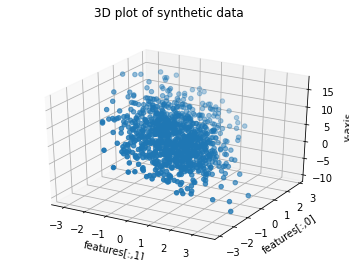

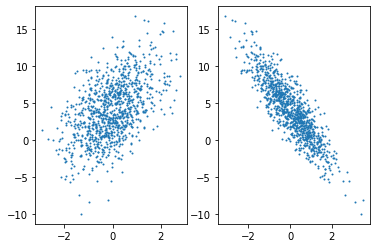

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(); ax=fig.gca(projection='3d') #gca = get current axes
ax.scatter(features[:,1], features[:,0], labels)

ax.set_xlabel("features[:,1]")
ax.set_ylabel("features[:,0]")
ax.set_zlabel("y-axis")

plt.suptitle("3D plot of synthetic data")
plt.show()

plt.subplot(1,2,1)
plt.scatter(features[:,0],labels,1)
plt.subplot(1,2,2)
plt.scatter(features[:,1],labels,1)
plt.show()

#Linear Neural Network

In [ ]:
import torch
import torch.nn as nn #very important basic library

X, y = torch.from_numpy(features).float(), torch.from_numpy(labels).float().reshape(-1,1) #we define it into pytorch tensor
print(X.shape, y.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [ ]:
#def data_iter(batch_size,features,labels):
#  num_examples = len(features)
#  indices = list(range(num_examples))
#  random.shuffle(indices)
#  for i in range(0, num_examples, batch_size):
#    batch_indices = np.array(indices[i: min(i+batch_size, num_examples)])
#    yield features[batch_indices], labels[batch_indices]

In [ ]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.layer = torch.nn.Linear(2,1,bias=True)

  def forward(self, inputs):
    outputs = self.layer(inputs)
    return outputs

model = LinearRegressionModel()

print(model.layer.weight.data)
print(model.layer.bias.data)

tensor([[-0.3623, -0.0289]])
tensor([0.1020])


epoch:1, loss:21.858009338378906
epoch:2, loss:9.830016136169434
epoch:3, loss:4.497230052947998
epoch:4, loss:2.099924325942993
epoch:5, loss:1.0037635564804077
epoch:6, loss:0.4922906160354614
epoch:7, loss:0.24803495407104492
epoch:8, loss:0.12839387357234955
epoch:9, loss:0.06822522729635239
epoch:10, loss:0.037167441099882126


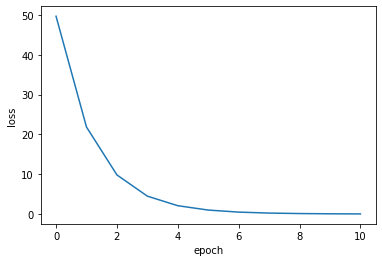

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

def load_array(data_arrays, batch_size, is_train=True):
  dataset = TensorDataset(*data_arrays)
  dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=is_train)

  return dataloader


batch_sizes = 10
num_epochs = 10
data_iter = load_array((X,y), batch_sizes)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)

loss_graph = []
loss_graph.append(criterion(model(X),y))
for epoch in range(num_epochs): #training part epoch: number of learning time 
  for X, y in data_iter:#one step for gradient descent
    predict = model(X)
    loss = criterion(predict, y) #
    optimizer.zero_grad() #gradient zero part
    loss.backward() #use backward function
    optimizer.step()  
  loss_epoch = criterion(model(X),y)
  loss_graph.append(loss_epoch)
  print("epoch:{}, loss:{}".format(epoch+1, loss_epoch))
plt.plot(loss_graph);
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# true_w = np.array([2, -3.4])
# true_b = 4.2

weight = model.layer.weight.detach().numpy()
bias = model.layer.bias.detach().numpy()

print("estimated_w={}".format(weight))
print("estimated_b={}".format(bias))

estimated_w=[[ 2.054535 -3.351545]]
estimated_b=[4.1330748]


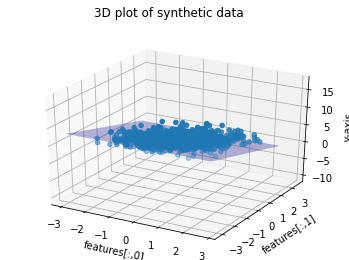

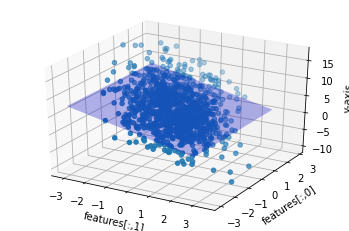

In [ ]:
X1 = np.arange(-3,3,0.25)
X2 = np.arange(-3,3,0.25)
X1, X2 = np.meshgrid(X1, X2)

def predict_surface(input_data, weight, bias):
  weight = weight.reshape(2,1)
  y_hat = np.dot(input_data.transpose(1, 0).reshape(-1,2), weight) +bias
  return y_hat

y_hat = predict_surface(X1, weight, bias)
y_hat = np.tile(y_hat, 2).reshape(X1.shape[0],-1)

fig = plt.figure(); ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, y_hat, color='b', alpha=0.3)
ax.scatter(features[:,0], features[:, 1], labels)
ax.set_xlabel("features[:,0]")
ax.set_ylabel("features[:,1]")
ax.set_zlabel("y-axis")

plt.suptitle("3D plot of synthetic data")

fig = plt.figure(); ax = fig.gca(projection='3d')
ax.plot_surface(X2, X1, y_hat, color='b', alpha=0.3)
ax.scatter(features[:,1], features[:, 0], labels)
ax.set_xlabel("features[:,1]")
ax.set_ylabel("features[:,0]")
ax.set_zlabel("y-axis")
plt.show() 

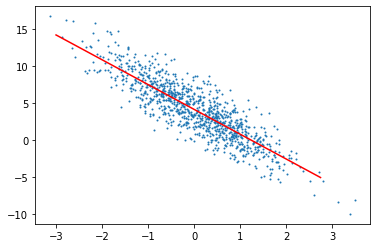

In [ ]:
X = np.arange(-3, 3, 0.25)

def predict_plot(input_data, weight, bias):
  weight = weight.reshape(2,1)
  input_data = np.array([np.zeros_like(input_data), input_data])
  input_data = input_data.transpose(1, 0)
  y_hat = np.dot(input_data.reshape(-1, 2), weight) + bias
  return y_hat

y_hat = predict_plot(X, weight, bias)

plt.scatter(features[:,1],labels, 1)
plt.plot(X, y_hat, color='r')
plt.show()